# 14 Visualizing Topography and Maps with PyVista

The topography of an area can be visualized in 3D with PyVista and additional maps can also be draped over the topography. 

<img src="../images/tutorial14_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/14_visualizing_topography_and_maps_with_pyvista/'

In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="14_visualizing_topography_and_maps_with_pyvista.zip", dirpath=file_path)

## Loading the data

A 50 m DEM of the Münsterland Basin is loaded to illustrate the visualizing of topography in PyVista. The data will be used under Datenlizenz Deutschland – Zero – Version 2.0. It was obtained from the WCS Service https://www.wcs.nrw.de/geobasis/wcs_nw_dgm. The data will automatically be converted to a StructuredGrid with ``Elevation [m]`` as data array.


In [3]:
import pyvista as pv

mesh = gg.visualization.read_raster(path=file_path + 'DEM50.tif', 
                                    nodata_val=9999.0,
                                    name='Elevation [m]')

mesh

StructuredGrid (0x23267807b20)
  N Cells:	5595201
  N Points:	5600000
  X Bounds:	3.236e+07, 3.250e+07
  Y Bounds:	5.700e+06, 5.800e+06
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	2000, 2800, 1
  N Arrays:	1

## Plotting the data in 2D

In [4]:
import rasterio

dem = rasterio.open(file_path + 'DEM50.tif')
dem.read(1)

array([[  0.  ,   0.  ,   0.  , ...,  40.1 ,  40.09,  44.58],
       [  0.  ,   0.  ,   0.  , ...,  40.08,  40.07,  44.21],
       [  0.  ,   0.  ,   0.  , ...,  40.14,  44.21,  43.98],
       ...,
       [100.56, 102.14, 102.17, ...,   0.  ,   0.  ,   0.  ],
       [ 99.44,  99.85,  99.77, ...,   0.  ,   0.  ,   0.  ],
       [ 88.32,  91.76,  98.68, ...,   0.  ,   0.  ,   0.  ]],
      dtype=float32)

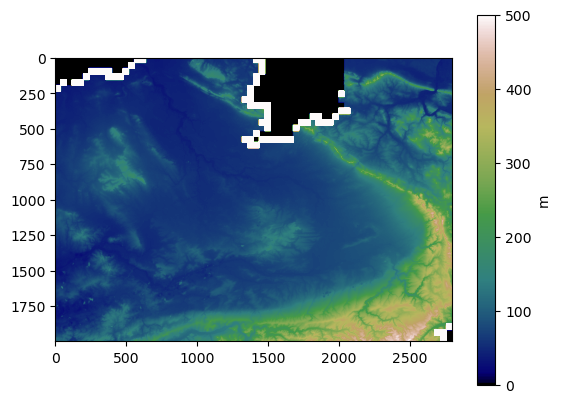

In [5]:
import matplotlib.pyplot as plt

im = plt.imshow(dem.read(1), cmap='gist_earth', vmin=0, vmax=500)
cbar = plt.colorbar(im)
cbar.set_label('m')

## Wrap Mesh by Scalars

The dataset’s points are wrapped by a point data scalars array’s values.

In [6]:
topo = mesh.warp_by_scalar(scalars="Elevation [m]", factor=15.0)

topo

StructuredGrid (0x2320cd72560)
  N Cells:	5595201
  N Points:	5600000
  X Bounds:	3.236e+07, 3.250e+07
  Y Bounds:	5.700e+06, 5.800e+06
  Z Bounds:	0.000e+00, 7.557e+03
  Dimensions:	2000, 2800, 1
  N Arrays:	1

## Plotting the Mesh

The mesh can then easily be plotted with PyVista

C:\Users\ale93371\Anaconda3\envs\gemgis_test\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


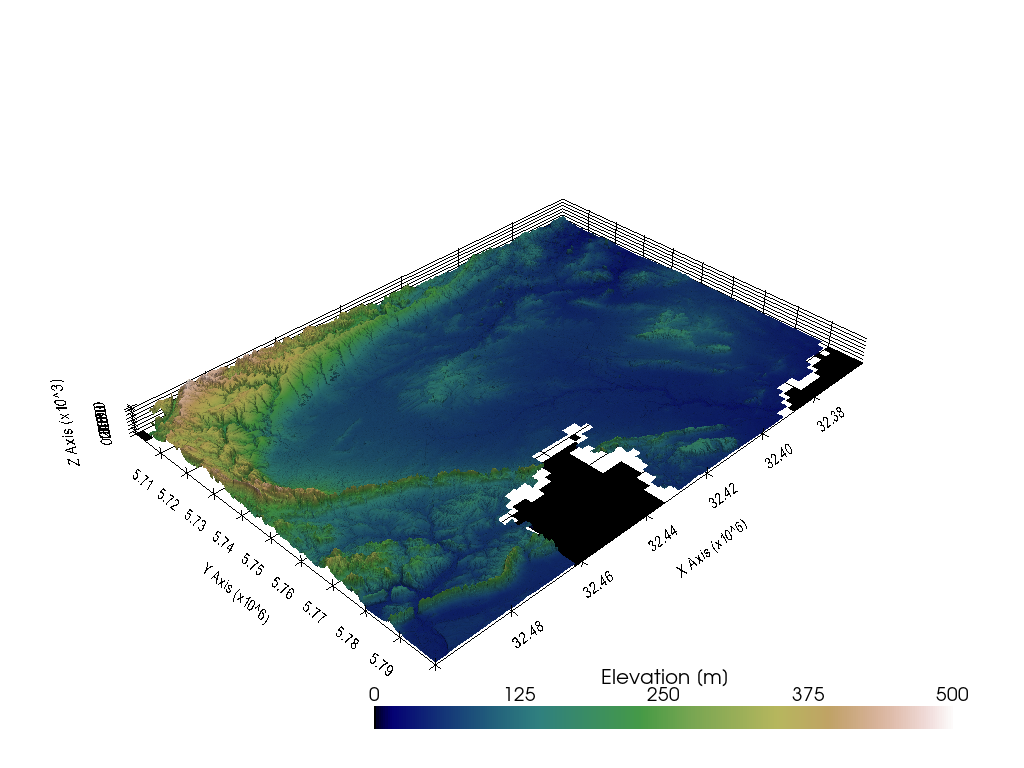

In [7]:
sargs = dict(fmt="%.0f", color='black')


p = pv.Plotter(notebook=True)
p.add_mesh(mesh=topo, cmap='gist_earth', scalar_bar_args=sargs, clim=[-0, 500])

p.set_background('white')
p.show_grid(color='black')
p.show()

## Drape Topographic map over Digital Elevation Model

It is also possible to drape a topographic map over the digital elevation model. The map will be loaded from a WMS service which will be introduced in a later tutorial in more detail. In order to make the feature work, the width and the height of both, the map data and the digital elevation model, must be the same!

### Loading the WMS Service



In [8]:
wms_map = gg.web.load_as_array('https://ows.terrestris.de/osm/service?',
                             'OSM-WMS', 'default', 'EPSG:4647', [32320000,32500000, 5690000, 5800000], [2800, 2000], 'image/png')

### Plotting the map data

Text(32405000, 5758000, 'Münster')

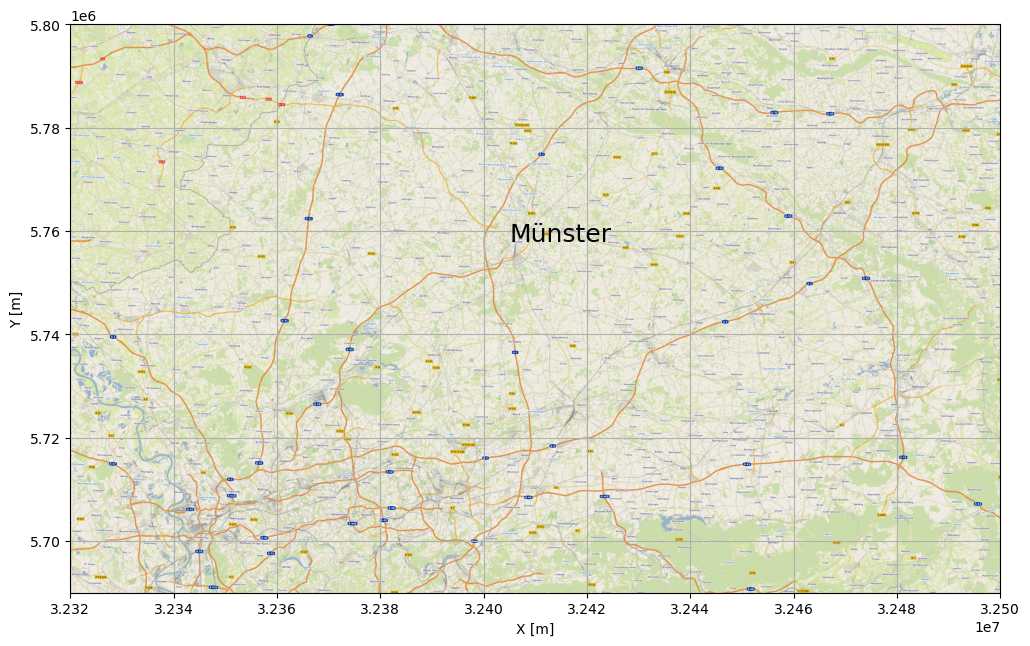

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,12))
plt.imshow(wms_map, extent= [32320000,32500000, 5690000, 5800000])
plt.grid()
plt.ylabel('Y [m]')
plt.xlabel('X [m]')
plt.text(32405000,5758000, 'Münster', size = 18)

### Converting the array values to RGB values

When downloading the wms_map, a total of three bands are downloaded. These array values need to be converted to RGB values.

In [10]:
wms_map[0]

array([[0.35686275, 0.35686275, 0.48235294, 1.        ],
       [0.40392157, 0.40784314, 0.52156866, 1.        ],
       [0.92941177, 0.92941177, 0.94509804, 1.        ],
       ...,
       [0.59607846, 0.69803923, 0.8       , 1.        ],
       [0.6156863 , 0.69411767, 0.76862746, 1.        ],
       [0.8784314 , 0.8666667 , 0.8156863 , 1.        ]], dtype=float32)

In [11]:
wms_map.shape

(2000, 2800, 4)

In [12]:
wms_stacked = gg.visualization.convert_to_rgb(array=wms_map)

wms_stacked[:2]

array([[[ 91,  91, 123],
        [103, 104, 133],
        [237, 237, 241],
        ...,
        [152, 178, 204],
        [157, 177, 196],
        [224, 221, 208]],

       [[255, 255, 255],
        [255, 255, 255],
        [247, 248, 243],
        ...,
        [150, 178, 206],
        [171, 175, 170],
        [250, 249, 243]]], dtype=uint8)

In [13]:
wms_stacked.shape

(2000, 2800, 3)

### Draping the array over the Digital Elevation Model

The map data of the WMS map can be draped over the digital elevation model. 

In [14]:
mesh, texture = gg.visualization.drape_array_over_dem(array=wms_stacked,
                                                      dem=dem)

In [15]:
mesh

StructuredGrid (0x2320e07be80)
  N Cells:	5595201
  N Points:	5600000
  X Bounds:	3.236e+07, 3.250e+07
  Y Bounds:	5.700e+06, 5.800e+06
  Z Bounds:	0.000e+00, 5.038e+02
  Dimensions:	2000, 2800, 1
  N Arrays:	1

In [16]:
texture

<Texture(0x00000232440EFCF0) at 0x000002320E0786A0>

### Plotting the data in PyVista

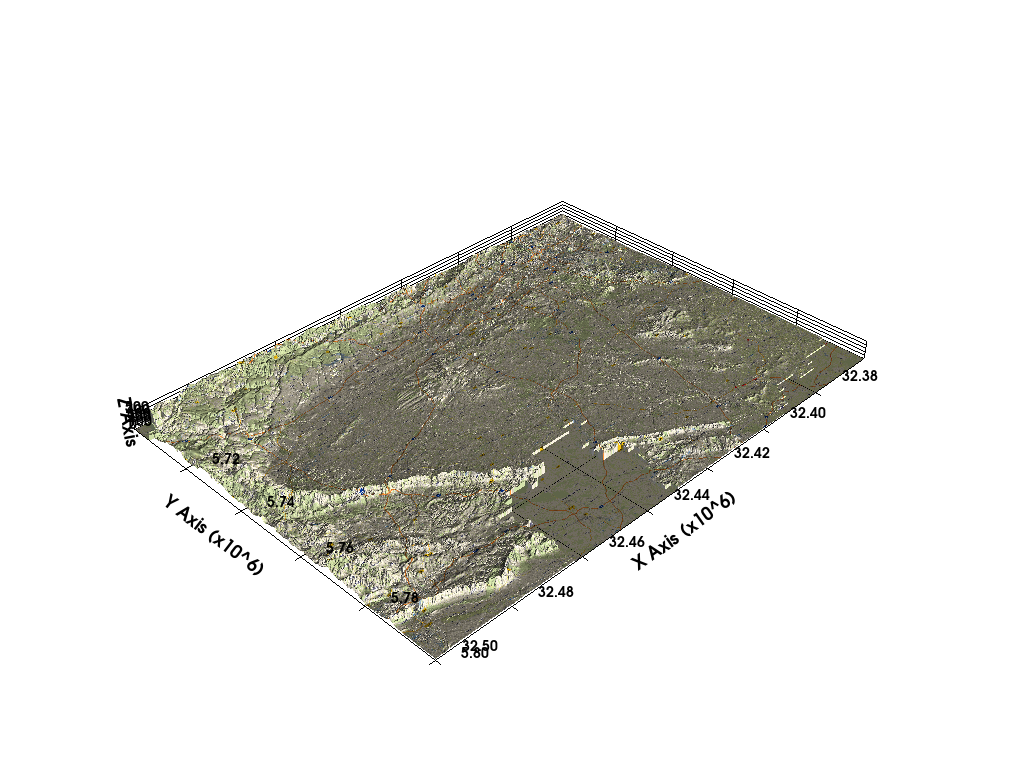

In [17]:
sargs = dict(fmt="%.0f", color='black')


p = pv.Plotter(notebook=True)
p.add_mesh(mesh=mesh, cmap='gist_earth', scalar_bar_args=sargs, texture=texture)

p.set_background('white')
p.show_grid(color='black')
p.set_scale(1,1,10)
p.show()